# Basic Analysis
Looking at the high-level trends and overall statistics of the dataset.

In [38]:
import pandas as pd
from matplotlib import pyplot as plt


In [39]:
read_columns = ['BOROUGH', 'Zip Code', 'Issuance Date', 'LATITUDE', 'LONGITUDE', 'Residential', 'Non-Profit', 'Job Type', 'Filing Date']
new_or_a1 = ['NB', 'A1']
permits_df = pd.read_csv('DOB_Permit_Issuance.csv', usecols=read_columns)
permits_df = permits_df[permits_df['Job Type'].isin(new_or_a1)]


In [40]:
# Convert `Issuance Date` to datetime
permits_df['Issuance Date'] = pd.to_datetime(permits_df['Issuance Date'])
yearly_df = permits_df.groupby(permits_df['Issuance Date'].dt.year).size().reset_index(name='count')

In [41]:
# Residency Permits by year
df_residencies_by_year = permits_df.groupby([permits_df['Issuance Date'].dt.year, permits_df['Residential']]).size().reset_index(name='count')
residency_pct_by_year = (100 * df_residencies_by_year['count'] / yearly_df['count']).round(1)
residency_pct_by_year_no_2023 = residency_pct_by_year.drop(residency_pct_by_year.index[-1])
median_yearly_residency = residency_pct_by_year_no_2023.median()

In [48]:
# 1. Total permits issued
total_permits = len(permits_df.index)

# Median permits by year (excluding 2023):
median_yearly = yearly_df.drop(yearly_df.index[-1])['count'].median()
median_yearly_str = f"{median_yearly.astype(int)}"

# 2022 Median:
value_2022 = yearly_df.iloc[33]['count']

# 2022 as pct of median:
pct_2022_of_median = (100*(value_2022 / median_yearly)).round(1)

residency_permits = permits_df['Residential'].fillna('').apply(lambda x: 1 if x == 'YES' else 0).sum()
residency_pct = (100 * (residency_permits/ total_permits)).round(1)

# 3. A breakdown by borough in percentages
borough_percentage = (permits_df['BOROUGH'].value_counts(normalize=True) * 100).round(1)
by_borough_df = pd.DataFrame(borough_percentage)

print_df = pd.DataFrame.from_dict(
        {
        'Permits issued (yearly median): ': median_yearly_str,
         '2022 permits issued:':  f"{value_2022.astype(int)}",
         '2022 permits (% of yearly median)': f"{pct_2022_of_median.round(1)}%",
         'Pct. of permits for residency (yearly median)': f"{median_yearly_residency.round(1)}%",
         '2022 pct. of permits for residency': f"{residency_pct_by_year_no_2023.iloc[-1]}%"
        },
        orient = 'index'
    )

# Summary Table

Focusing on how the most recent full year of data (2022) compares to the typical values. We can see significantly fewer permits were issued in 2022 than the typical. Also, a slightly lower percentage were for residencies than typical.

In [44]:
print_df.style

,0
Permits issued (yearly median):,28683
2022 permits issued:,16493
2022 permits (% of yearly median),57.5%
Pct. of permits for residency (yearly median),74.3%
2022 pct. of permits for residency,72.0%


[Text(0.5, 0, ''), Text(0, 0.5, '')]

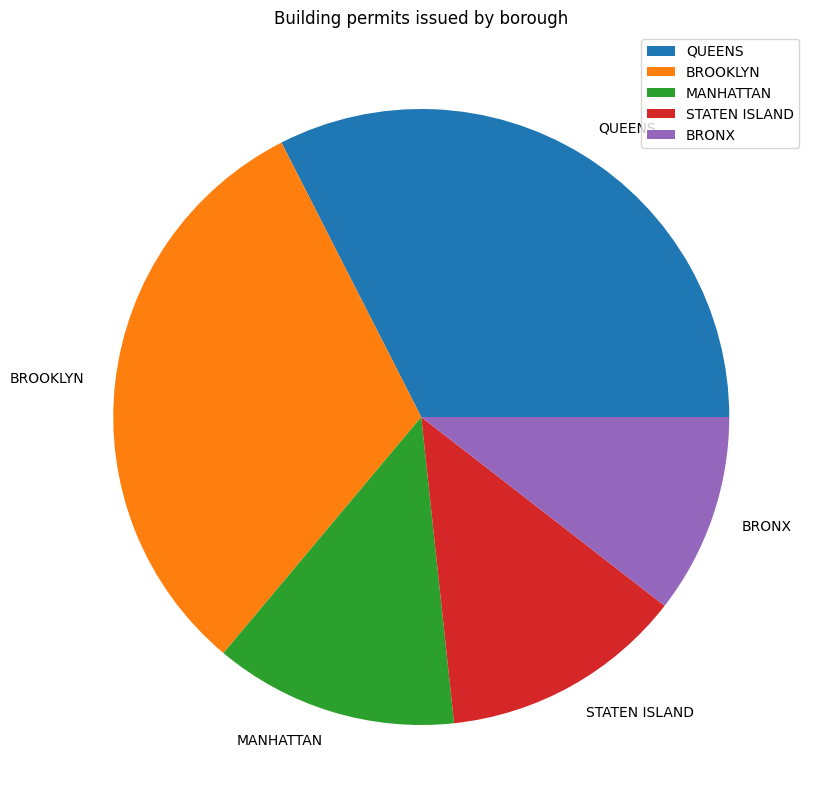

In [45]:
bar_chart = by_borough_df.plot.pie(figsize=(10,10), title="Building permits issued by borough", y="BOROUGH")
bar_chart.set(xlabel="", ylabel="")


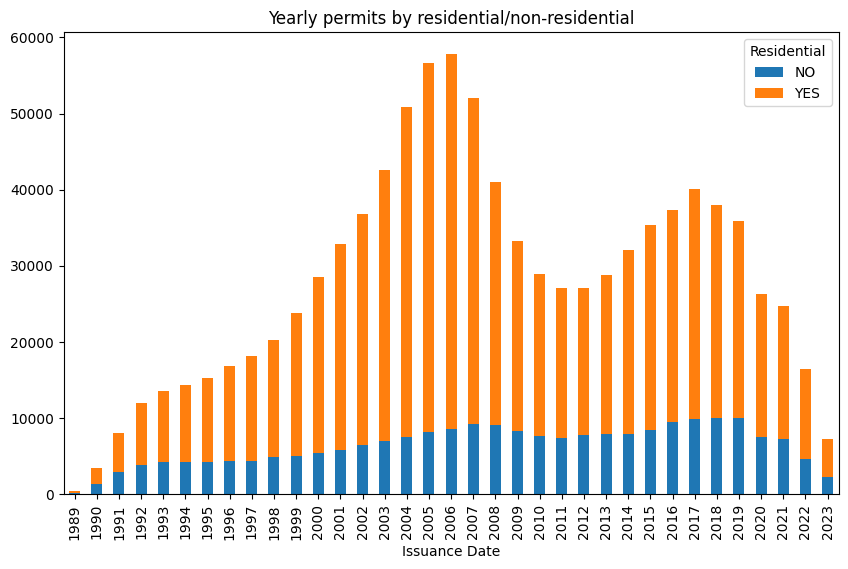

In [46]:
residency_split_df = permits_df
residency_split_df['Residential'].fillna('NO', inplace=True)
residency_split_by_year = residency_split_df.groupby([permits_df['Issuance Date'].dt.year, permits_df['Residential']]).size().reset_index(name='count')
residency_split_by_year['Issuance Date'] = residency_split_by_year['Issuance Date'].astype(int)
pivot_residency = residency_split_by_year.pivot(index='Issuance Date', columns='Residential', values='count')
ax = pivot_residency.plot(kind='bar', stacked=True, figsize=(10, 6), title="Yearly permits by residential/non-residential")


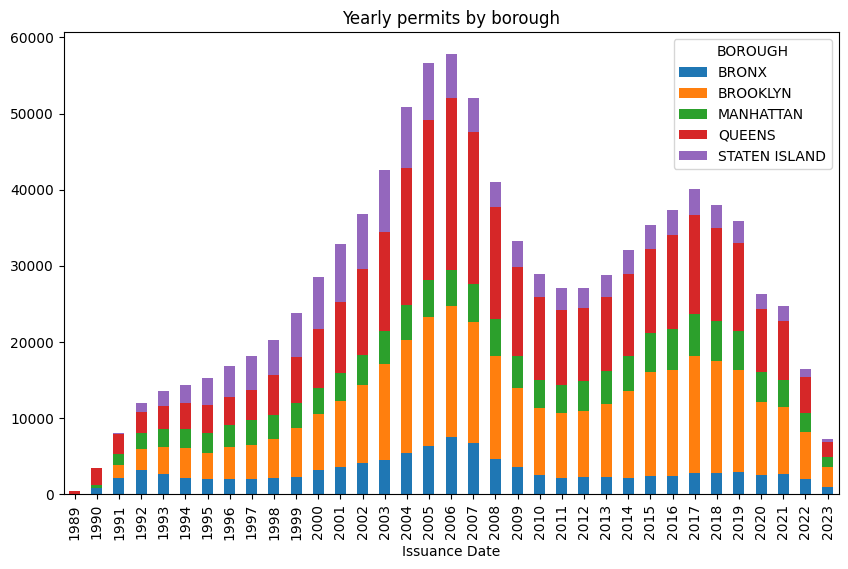

In [47]:
borough_split_df = permits_df

borough_split_df_by_year = borough_split_df.groupby([permits_df['Issuance Date'].dt.year, permits_df['BOROUGH']]).size().reset_index(name='count')

borough_split_df_by_year['Issuance Date'] = borough_split_df_by_year['Issuance Date'].astype(int)
pivot_residency = borough_split_df_by_year.pivot(index='Issuance Date', columns='BOROUGH', values='count')

ax = pivot_residency.plot(kind='bar', stacked=True, figsize=(10, 6), title="Yearly permits by borough")
